In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os
import math
import copy
from collections import OrderedDict, defaultdict

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl
from tqdm.notebook import tqdm
from scipy.integrate import simps

sys.path.append('..')
from env_config import DATA_PATH, PROJECT_PATH
from utils import get_config, get_normalized_dist, save_correlations, read_fits_to_pandas, read_correlations
from data_lotss import get_lotss_redshift_distribution, get_skads_sim_data, read_lotss_noise_weight_map, get_lotss_data, get_lotss_map, get_lotss_redshift_distribution, get_biggest_optical_region, get_redshift_distributions
from experiment import Experiment, show_mcmc_report, run_experiments
from plotting import my_mollview, plot_correlation_matrix, plot_correlation, plot_many_data_correlations, plot_correlation_comparison
from cosmology import get_theory_correlations
from redshift import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

In [4]:
data_name = 'LoTSS_DR2'

# Run correlations

In [5]:
config = get_config('LoTSS_DR2')
display(config)

In [6]:
experiment = Experiment(config, set_data=True, set_maps=True)

19/01/2022 13:31:36 INFO: Setting data..


Original LoTSS DR2 datashape: (1819424, 93)


19/01/2022 13:31:41 INFO: Setting maps..


Total flux of S > 2 mJy: (469944, 93)
Signal to noise > 5: (424219, 93)


19/01/2022 13:32:08 INFO: NSIDE = 2048
19/01/2022 13:32:08 INFO: ORDERING = RING in fits file
19/01/2022 13:32:08 INFO: INDXSCHM = IMPLICIT
19/01/2022 13:32:09 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
19/01/2022 13:32:09 INFO: -> fwhm is 0.000000 arcmin
19/01/2022 13:32:09 INFO: NSIDE = 2048
19/01/2022 13:32:09 INFO: ORDERING = RING in fits file
19/01/2022 13:32:09 INFO: INDXSCHM = IMPLICIT


In [7]:
experiment.set_correlations(with_covariance=True)

18/01/2022 17:05:29 INFO: Setting data correlations..


data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

18/01/2022 17:05:31 INFO: Setting theory correlations..
18/01/2022 17:05:32 INFO: Setting covariance..


covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
# save_correlations(experiment)

Correlations saved to: /home/snakoneczny/workspace/cmb_lss/outputs/correlations/LoTSS_DR2/LoTSS_DR2_srl__mask_coverage__2mJy_snr=5_nside=512_gg-gk_bin=50.csv


In [40]:
# Save map
filepath = os.path.join(DATA_PATH, 'LoTSS/DR2/maps', 'counts_optical_{}mJy_{}SNR_nside={}.fits'.format(experiment.config.flux_min_cut, experiment.config.signal_to_noise, experiment.config.nside))
hp.fitsfunc.write_map(filepath, experiment.base_maps['g'])
print('Map saved to: {}'.format(filepath))

19/01/2022 15:28:00 WARNING: setting the output map dtype to [dtype('float64')]


Map saved to: /home/snakoneczny/data/LoTSS/DR2/maps/counts_optical_2mJy_5SNR_nside=512.fits


In [28]:
# Save masks

from data_lotss import get_dr2_optical_region

for nside in [256, 512, 1024, 2048, 4096]:
    mask = get_dr2_optical_region(nside)
    filepath = os.path.join(DATA_PATH, 'LoTSS/DR2/masks', 'mask_optical_nside={}.fits'.format(nside))
    hp.fitsfunc.write_map(filepath, mask)
    print('Mask saved to: {}'.format(filepath))

19/01/2022 13:53:20 WARNING: setting the output map dtype to [dtype('float64')]


Mask saved to: /home/snakoneczny/data/LoTSS/DR2/masks/mask_optical_nside=256.fits


19/01/2022 13:53:41 WARNING: setting the output map dtype to [dtype('float64')]


Mask saved to: /home/snakoneczny/data/LoTSS/DR2/masks/mask_optical_nside=512.fits


19/01/2022 13:55:05 WARNING: setting the output map dtype to [dtype('float64')]


Mask saved to: /home/snakoneczny/data/LoTSS/DR2/masks/mask_optical_nside=1024.fits


KeyboardInterrupt: 

# Final gk & gg

## 2mJy

In [9]:
# Coverage, 2mJy, SNR 5,  50 < l < 800
experiment.print_correlation_statistics()

C_gg sigma: 215.06
C_gg chi squared: 145.86
C_gk sigma: 18.89
C_gk chi squared: 13.14


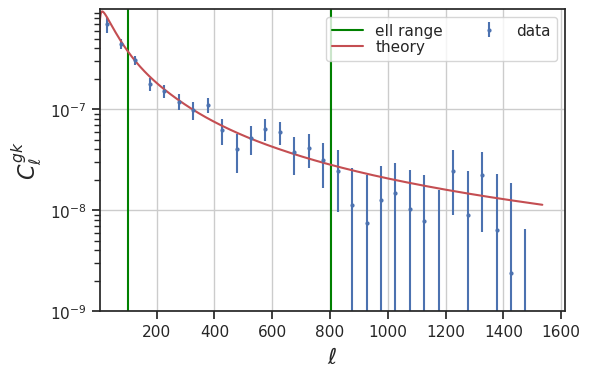

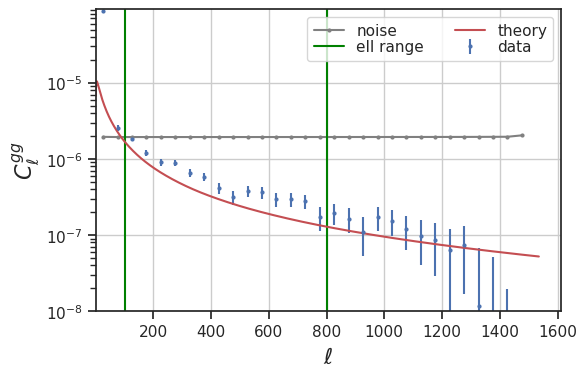

In [8]:
# HERE x4, deep fields, 1/D(z), b = 1.4
# Coverage, 2 mJy, SNR 5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

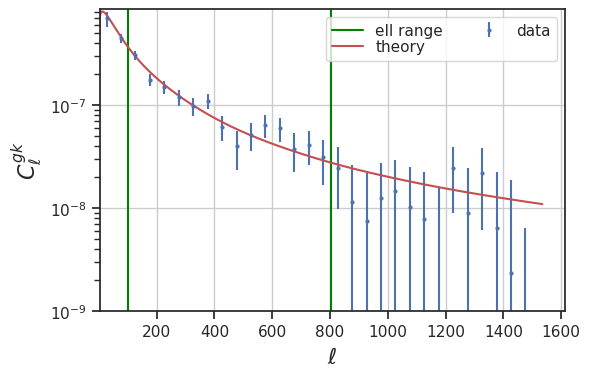

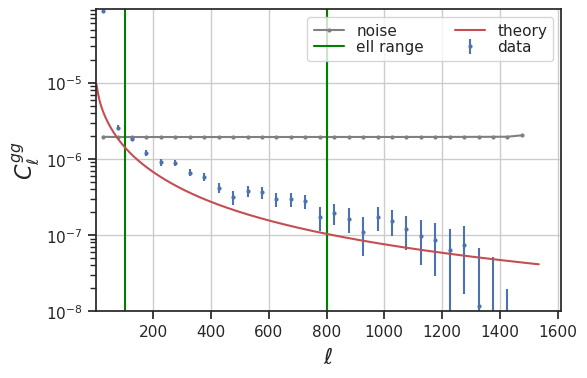

In [8]:
# HERE x3, tomographer fit 1/D(z), b = 1.4
# Coverage, 2 mJy, SNR 5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

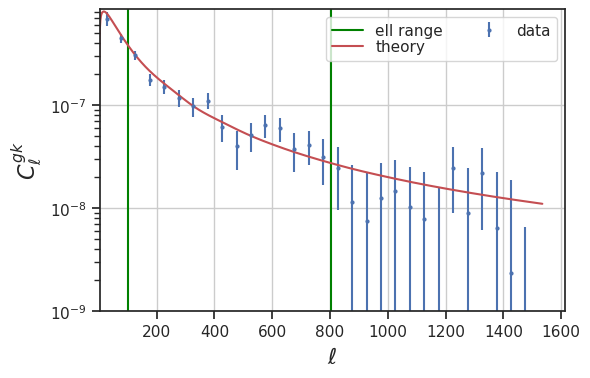

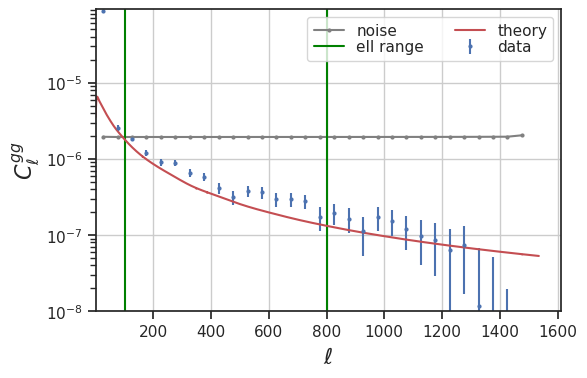

In [8]:
# HERE x2, tomographer, b_eff = 2.4
# Coverage, 2 mJy, SNR 5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

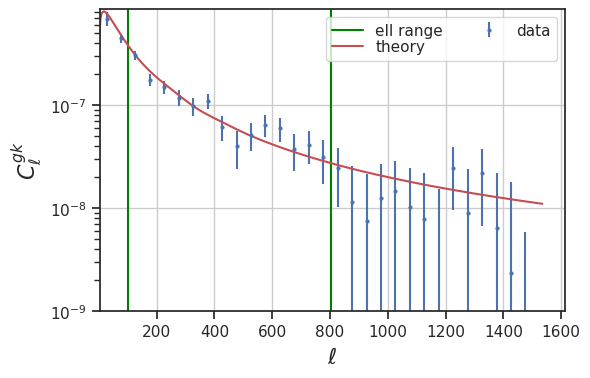

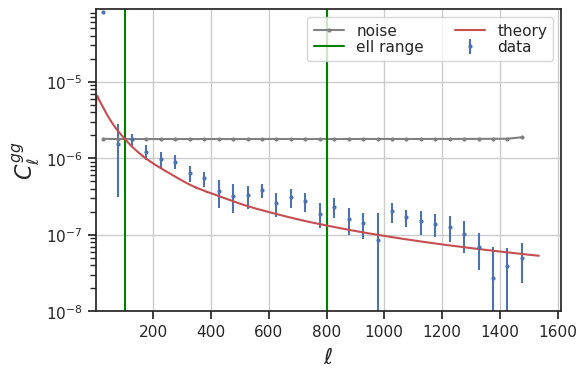

In [8]:
# HERE, tomographer, b_eff = 2.4
# Coverage, 2 mJy, SNR 5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

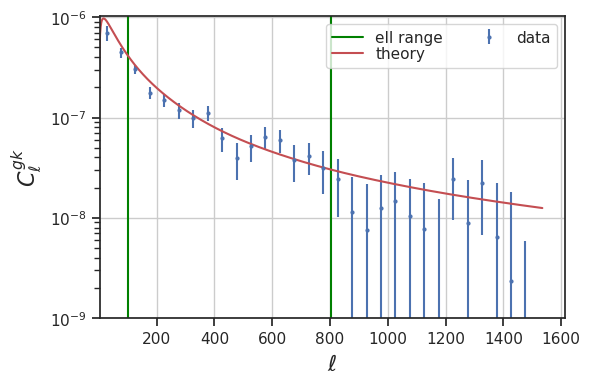

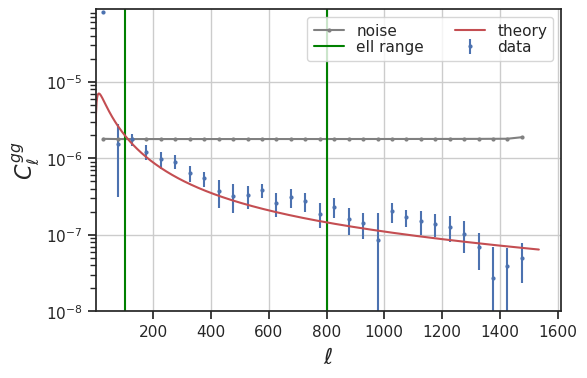

In [8]:
# HERE, power law
# Coverage, 2 mJy, SNR 5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

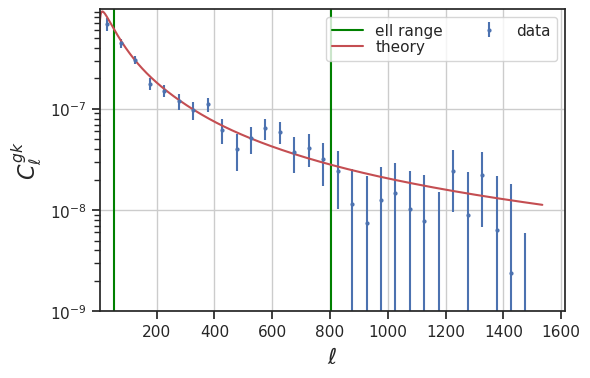

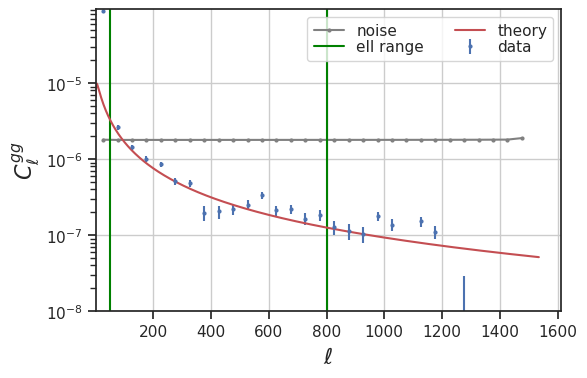

In [8]:
# Coverage, 2 mJy, SNR 5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

## 1mJy

In [8]:
# Coverage, 1 mJy, SNR 3,  50 < l < 800
experiment.print_correlation_statistics()

C_gg sigma: 201.90
C_gg chi squared: 79.64
C_gk sigma: 23.30
C_gk chi squared: 21.59


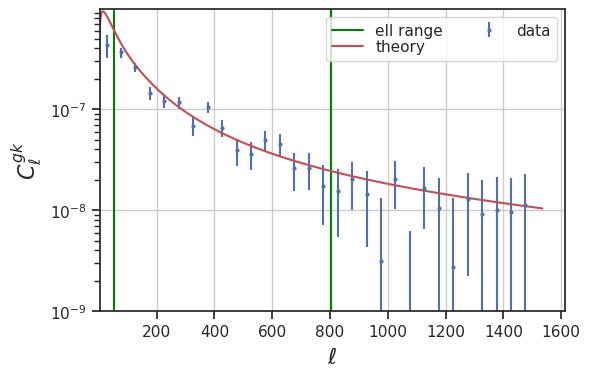

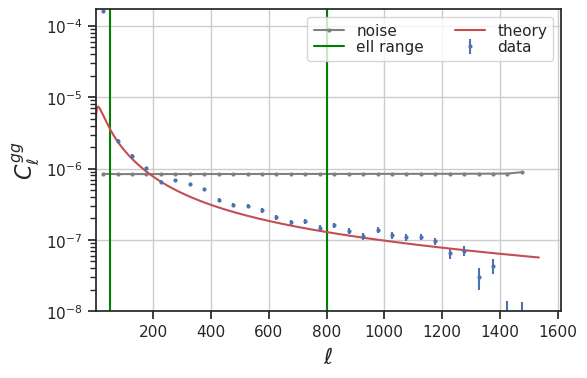

In [7]:
# Non optical, no scalling, coverage, 1 mJy, SNR 3
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

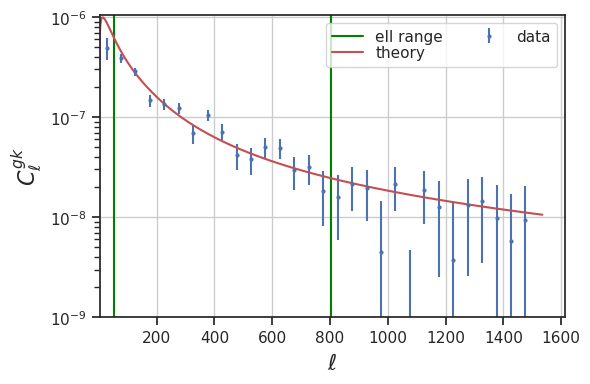

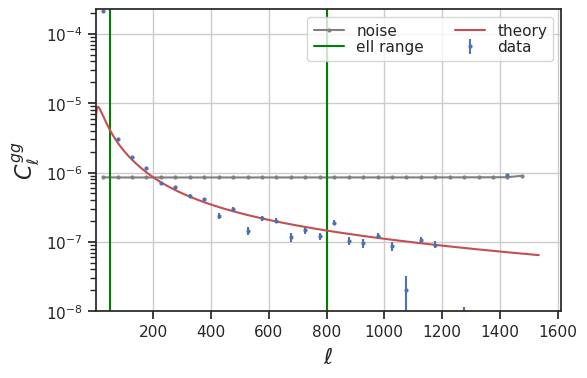

In [7]:
# Coverage, 1 mJy, SNR 3
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

## 0.5mJy

In [7]:
# Coverage, 0.5 mJy, SNR 3, 50 (100) < l < 800
experiment.print_correlation_statistics()

C_gg sigma: 196.92
C_gg chi squared: 103.11
C_gk sigma: 25.14
C_gk chi squared: 23.88


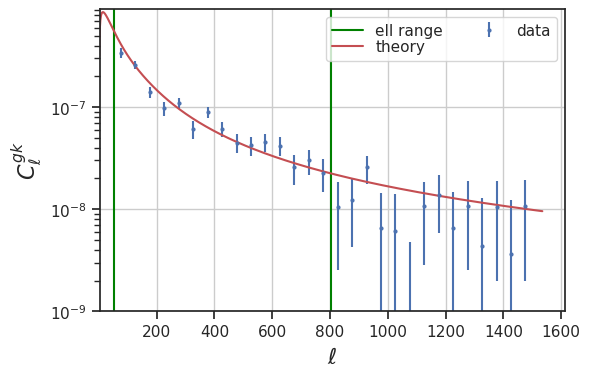

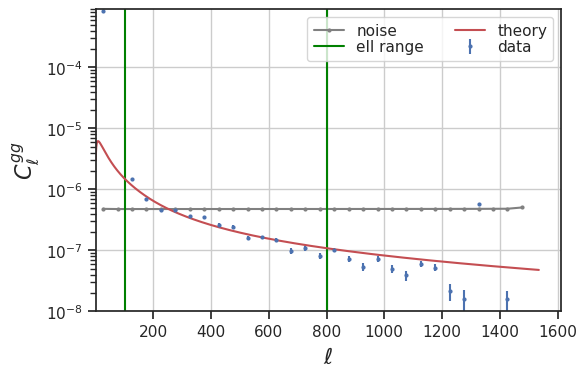

In [8]:
# Coverage, 0.5 mJy, SNR 3
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

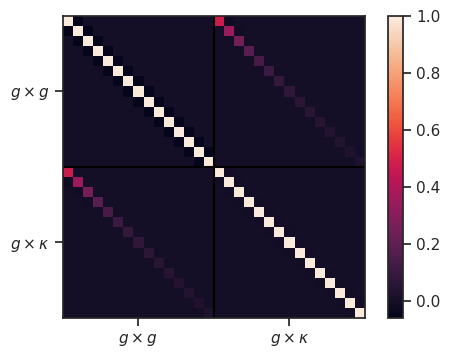

In [9]:
# Coverage, 2 mJy, SNR 3
plot_correlation_matrix(experiment)

# Final gT

## Sigmas

In [7]:
# Coverage 0.5 mJy, SNR 3, l < 34
experiment.print_correlation_statistics()

C_gg sigma: 115.71
C_gg chi squared: 2357913.91
C_gt sigma: 5.02
C_gt chi squared: 58.18


In [7]:
# Coverage 1 mJy, SNR 3, l < 66
experiment.print_correlation_statistics()

C_gg sigma: 69.52
C_gg chi squared: 88459.59
C_gt sigma: 3.55
C_gt chi squared: 23.19


In [7]:
# Coverage 1 mJy, SNR 3, l < 34
experiment.print_correlation_statistics()

C_gg sigma: 55.48
C_gg chi squared: 85393.29
C_gt sigma: 3.72
C_gt chi squared: 20.80


In [7]:
# Coverage 2 mJy, SNR 5, l < 34
experiment.print_correlation_statistics()

C_gg sigma: 34.94
C_gg chi squared: 12153.62
C_gt sigma: 3.47
C_gt chi squared: 15.86


## 0.5mJy

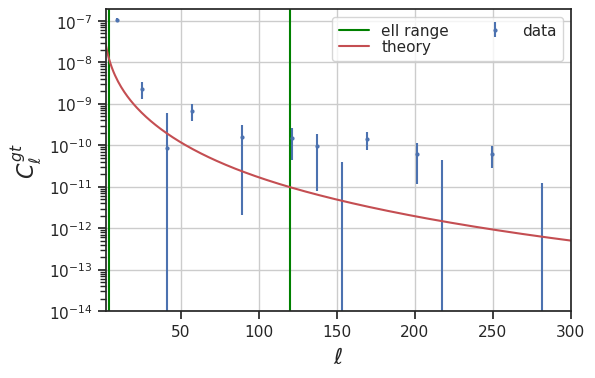

In [7]:
# Coverage, 0.5 mJy, SNR 3
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')

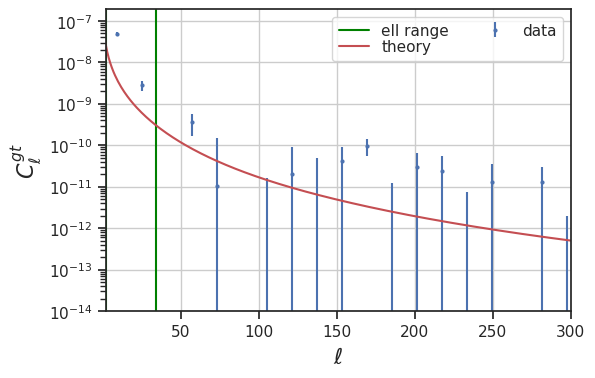

In [8]:
# Coverage, 0.5 mJy, SNR 3
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')

## 1mJy

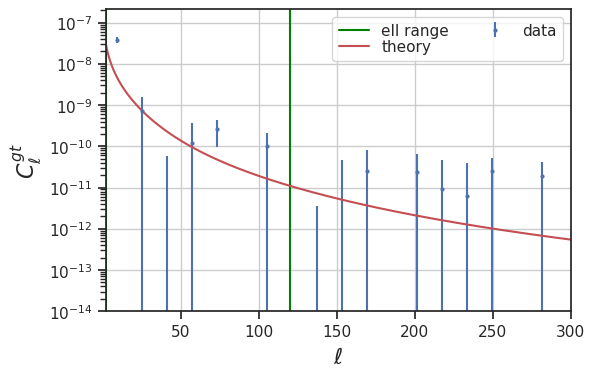

In [7]:
# Coverage, 1 mJy, SNR 3, NEW Z DIST
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')

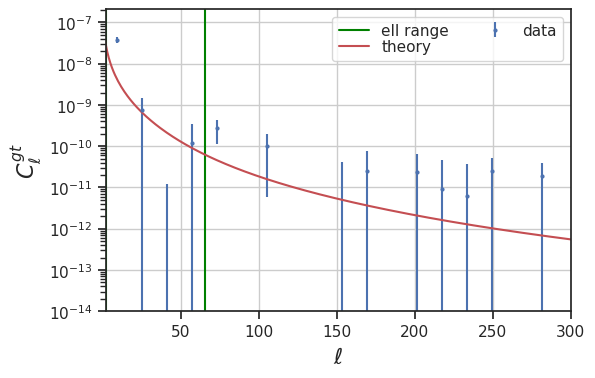

In [8]:
# Coverage, 1 mJy, SNR 3
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')

## 2mJy

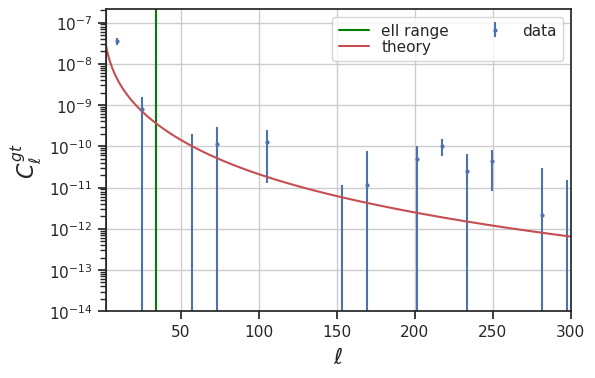

In [8]:
# Coverage, 2 mJy, SNR 5
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')

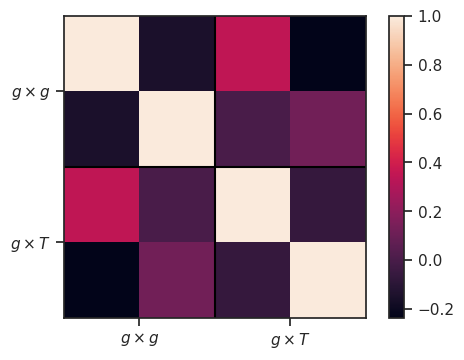

In [9]:
# coverage, 0.5 mJy, l < 34
plot_correlation_matrix(experiment)

In [111]:
fname = 'LoTSS_DR2/LoTSS_DR2_{}__mask_optical__2mJy_snr=5_nside=512_gg-gk_bin=50'
corr_opt_msk_opt = read_correlations(fname.format('opt'))
corr_srl_msk_opt = read_correlations(fname.format('srl'))

fname = 'LoTSS_DR2/LoTSS_DR2_{}__mask_coverage__2mJy_snr=5_nside=512_gg-gk_bin=50'
corr_srl_msk_cvrg = read_correlations(fname.format('srl'))

In [112]:
multi_noise, multi_noise_err = corr_srl_msk_cvrg['nl_gg_multicomp'][0], corr_srl_msk_cvrg['nl_gg_multicomp_err'][0]
print('Multicomponent shotnoise: {}'.format(multi_noise))
print('Multicomponent shotnoise error: {}'.format(multi_noise_err))

corr_srl_msk_opt_corrected = copy.copy(corr_srl_msk_opt)    
corr_srl_msk_opt_corrected['Cl_gg'] -= multi_noise
corr_srl_msk_opt_corrected['error_gg'] = np.sqrt(corr_srl_msk_opt_corrected['error_gg'] ** 2 + multi_noise_err ** 2)

Multicomponent shotnoise: 1.501956737947327e-07
Multicomponent shotnoise error: 3.69118511734784e-08


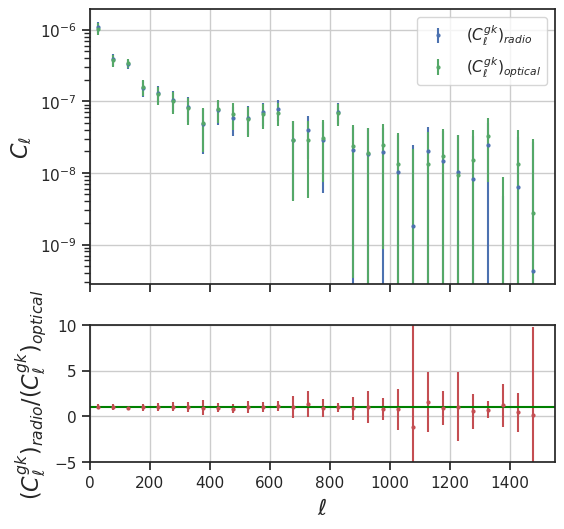

In [20]:
# C_gk comparison in optical field
plot_correlation_comparison(corr_srl_msk_opt, corr_opt_msk_opt, correlation_symbols=['gk', 'gk'], correlation_names=['radio', 'optical'], x_min=0, x_max=None, y_min=-5, y_max=10, x_scale='linear', y_scale='linear', title=None, with_error=True)

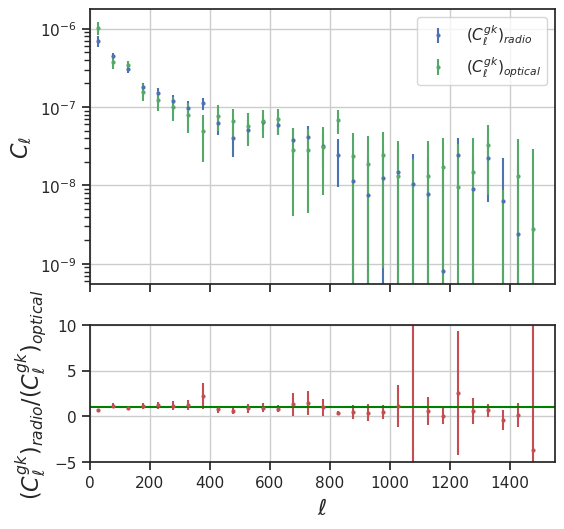

In [21]:
# C_gk comparison between optical and radio fields
plot_correlation_comparison(corr_srl_msk_cvrg, corr_opt_msk_opt, correlation_symbols=['gk', 'gk'], correlation_names=['radio', 'optical'], x_min=0, x_max=None, y_min=-5, y_max=10, x_scale='linear', y_scale='linear', title=None, with_error=True)

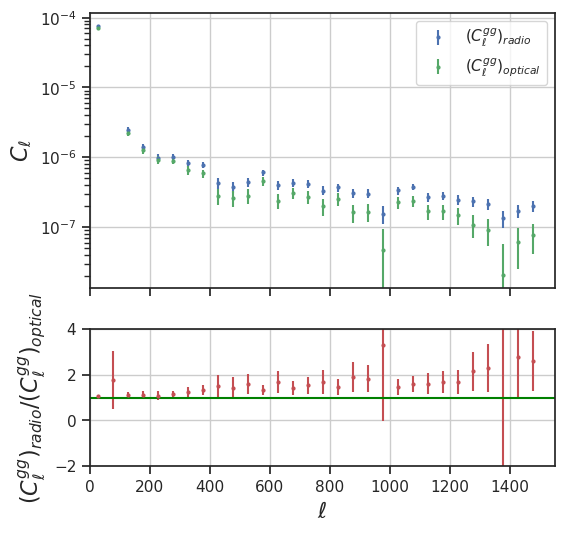

In [22]:
# C_gg comparison in optical field
plot_correlation_comparison(corr_srl_msk_opt, corr_opt_msk_opt, correlation_symbols=['gg', 'gg'], correlation_names=['radio', 'optical'], x_min=0, x_max=None, y_min=-2, y_max=4, x_scale='linear', y_scale='linear', title=None, with_error=True)

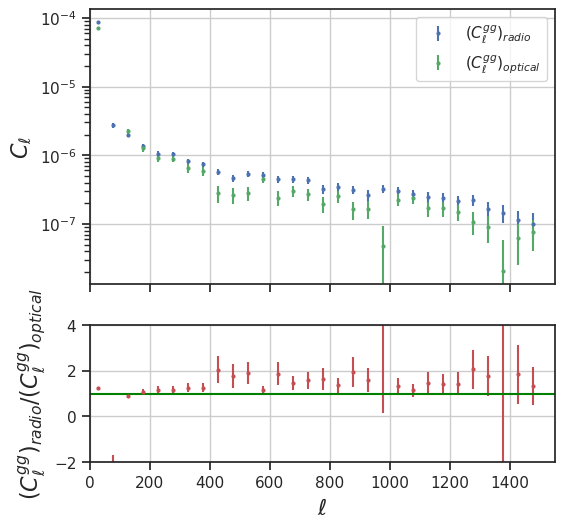

In [25]:
# C_gg raw in radio field vs optical in optical field
plot_correlation_comparison(corr_srl_msk_cvrg, corr_opt_msk_opt, correlation_symbols=['gg', 'gg'], correlation_names=['radio', 'optical'], is_raw=[True, False], x_min=0, x_max=None, y_min=-2, y_max=4, x_scale='linear', y_scale='linear', title=None, with_error=True)

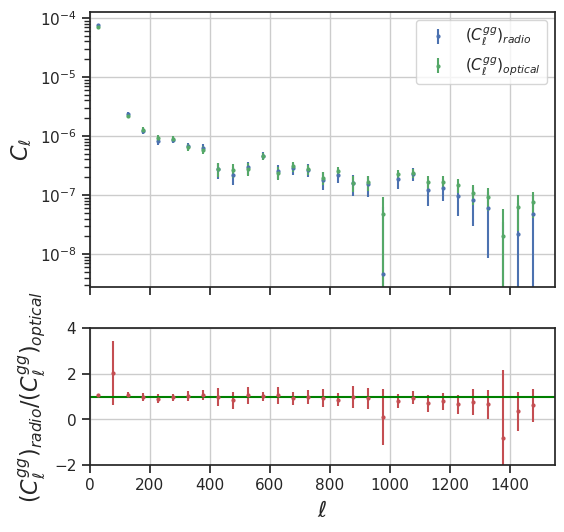

In [26]:
# C_gg comparison in optical field with correction for multicomponent shotnoise
plot_correlation_comparison(corr_srl_msk_opt_corrected, corr_opt_msk_opt, correlation_symbols=['gg', 'gg'], correlation_names=['radio', 'optical'], x_min=0, x_max=None, y_min=-2, y_max=4, x_scale='linear', y_scale='linear', title=None, with_error=True)

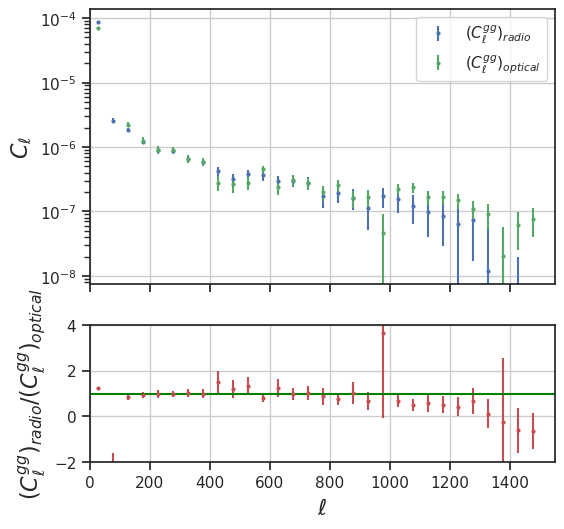

In [27]:
# C_gg fixed for multicomponent shotnoise in radio field vs optical in optical field
plot_correlation_comparison(corr_srl_msk_cvrg_corrected, corr_opt_msk_opt, correlation_symbols=['gg', 'gg'], correlation_names=['radio', 'optical'], x_min=0, x_max=None, y_min=-2, y_max=4, x_scale='linear', y_scale='linear', title=None, with_error=True)

# Theoretical models

## z-tail and cosmology

In [5]:
config = get_config('LoTSS_DR2')
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'is_optical': True,
 'lss_mask_name': 'Mask_coverage',
 'nside': 512,
 'flux_min_cut': 1,
 'signal_to_noise': 3,
 'new_z_dist': True,
 'z_tail': 1.1,
 'z_sfg': 0.24,
 'z_agn': 1.5,
 'r': 0.007,
 'scale_bias': True,
 'bias': 1.2,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'l_range': {'gg': [2, 120], 'gt': [2, 120]},
 'ells_per_bin': {'gg': 16, 'gt': 16},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [5]:
to_plot_tuples = [('bias', np.arange(0.8, 2.0, 0.1)), ('z_tail', np.arange(0.8, 2.0, 0.1)), ('Omega_c_b_frac', np.arange(0.5, 1.6, 0.1)), ('Omega_k', np.arange(-0.2, 0.21, 0.05))]
to_plot_correlations = ['gg', 'gk', 'gt']

config = get_config('LoTSS_DR2')
l_arr = np.arange(3 * config['nside'])

correlations = {}
for to_plot_tuple in to_plot_tuples:
    param_name = to_plot_tuple[0]
    param_values = to_plot_tuple[1]

    correlations[param_name] = {}
    for param_value in param_values:
        omega_param = None
        if param_name in config:
            config[param_name] = param_value
        else:
            omega_param = (param_name, param_value)
        correlations[param_name][param_value] = get_theory_correlations(config, to_plot_correlations, l_arr, omega_param)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/pyccl/cls.py:46: CCLWarning: CCL does not properly use the hyperspherical Bessel functions when computing angular power spectra in non-flat cosmologies!
  category=CCLWarning)


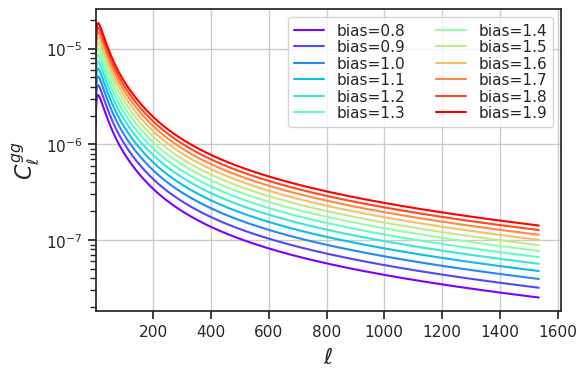

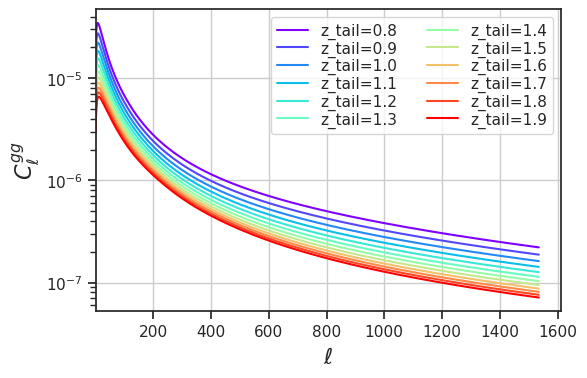

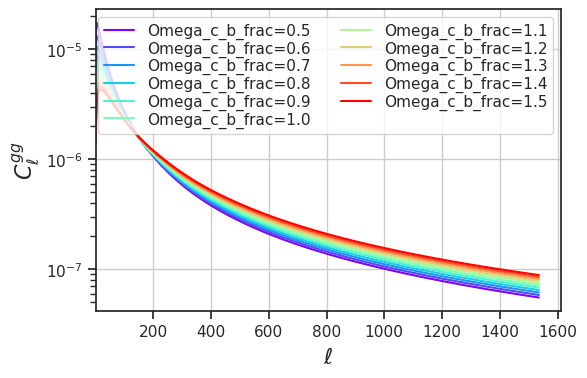

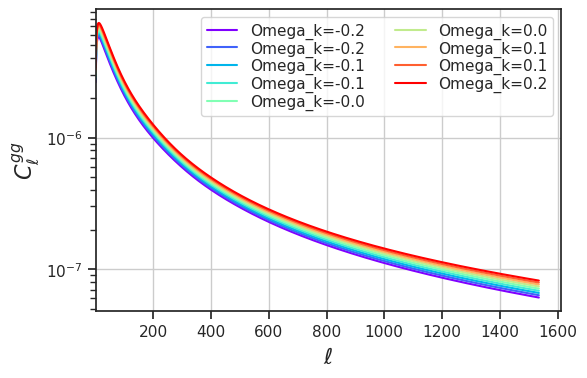

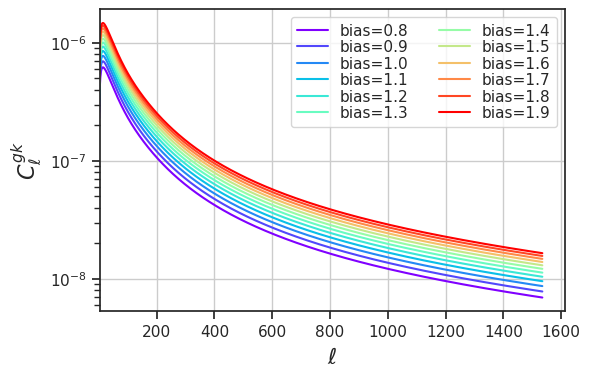

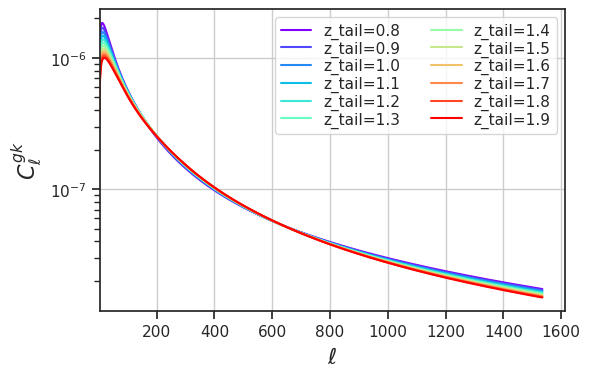

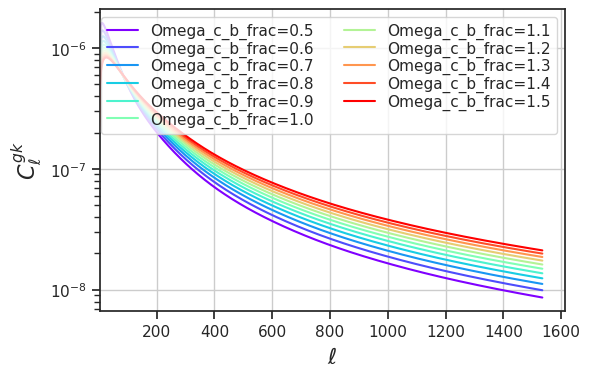

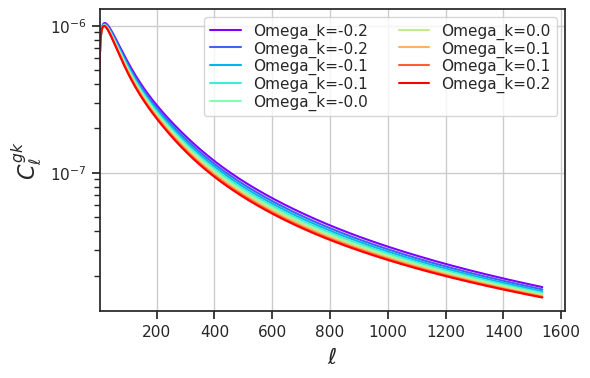

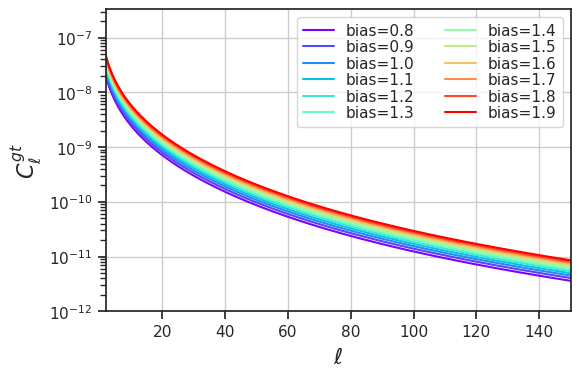

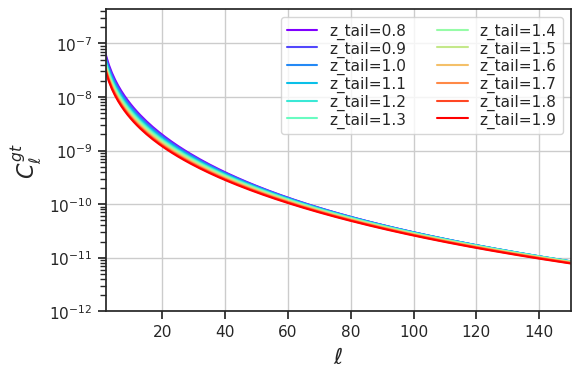

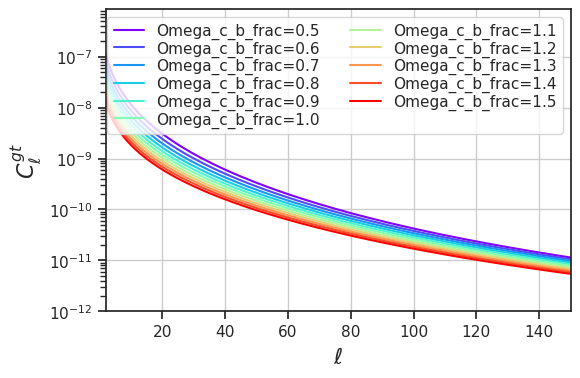

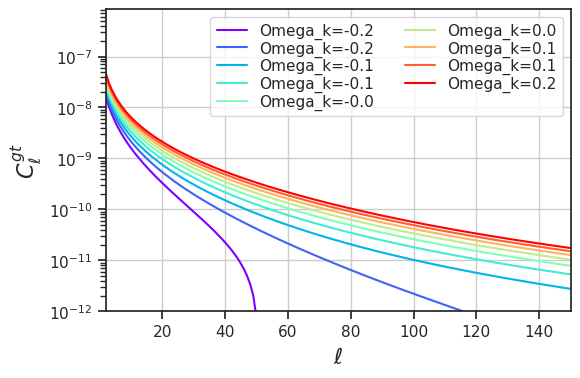

In [6]:
for correlation_symbol in to_plot_correlations:
    for param_name, param_values in to_plot_tuples:
        plt.figure()

        colors = plt.cm.rainbow(np.linspace(0, 1, len(param_values)))
        for i, param_value in enumerate(param_values):
            plt.plot(l_arr, correlations[param_name][param_value][correlation_symbol], label='{}={:.1f}'.format(param_name, param_value), c=colors[i])

        plt.xlim(xmin=2, xmax=None)
        if correlation_symbol == 'gt':
            plt.xlim(xmin=2, xmax=150)
            plt.ylim(ymin=1e-12, ymax=None)

        plt.xscale('linear')
        plt.yscale('log')
        plt.xlabel('$\\ell$', fontsize=16)
        plt.ylabel('$C_\\ell^{{{}}}$'.format(correlation_symbol), fontsize=16)
        plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
        plt.grid()
        plt.show()

## AGN power law

In [4]:
config = get_config('LoTSS_DR2')
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'is_optical': True,
 'lss_mask_name': 'Mask_coverage',
 'nside': 512,
 'flux_min_cut': 2,
 'signal_to_noise': 5,
 'dn_dz_model': 'power_law',
 'z_tail': 1.3,
 'z_sfg': 0.13,
 'a': 4.66,
 'r': 0.94,
 'scale_bias': True,
 'bias': 1.4,
 'read_data_correlations_flag': False,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'l_range': {'gg': [52, 802], 'gk': [52, 802]},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [8]:
config = get_config('LoTSS_DR2')
to_plot_correlations = ['gg', 'gk', 'gt']
to_plot_tuples = [
    ('z_sfg', np.arange(0.05, 0.21, 0.02)),
    ('a', np.arange(4.2, 5.0, 0.1)),
    ('r', np.arange(0.8, 1.0, 0.02)),
    ('bias', np.arange(1.0, 1.8, 0.1)),
]

l_arr = np.arange(3 * config['nside'])

correlations = {}
for to_plot_tuple in to_plot_tuples:
    param_name = to_plot_tuple[0]
    param_values = to_plot_tuple[1]

    correlations[param_name] = {}
    for param_value in param_values:
        config[param_name] = param_value
        correlations[param_name][param_value] = get_theory_correlations(config, to_plot_correlations, l_arr)

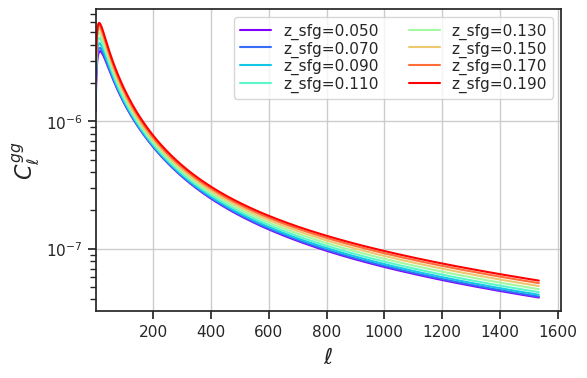

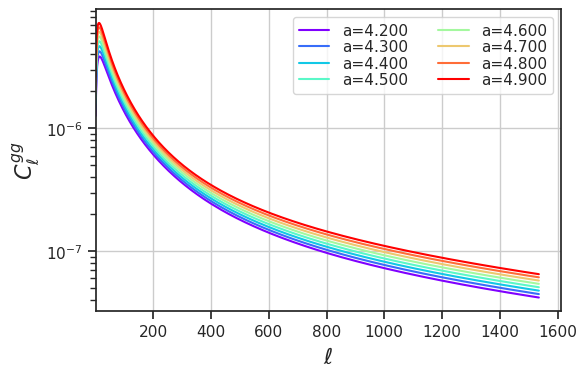

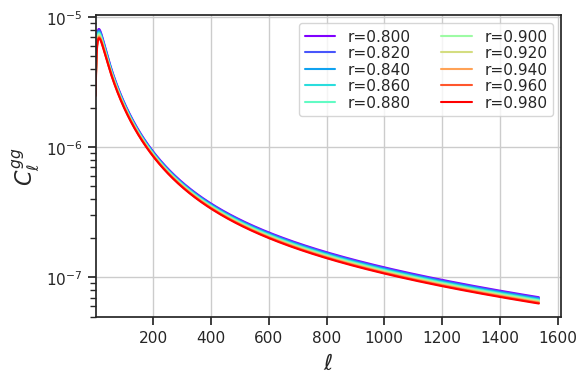

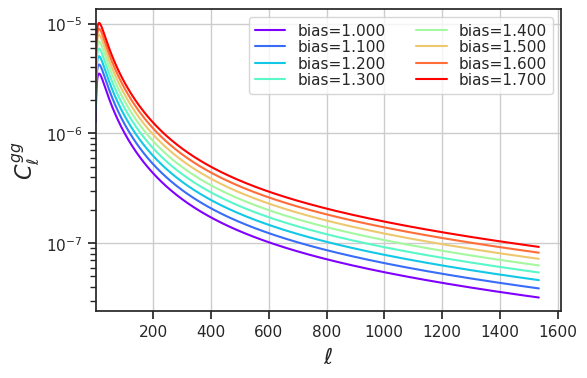

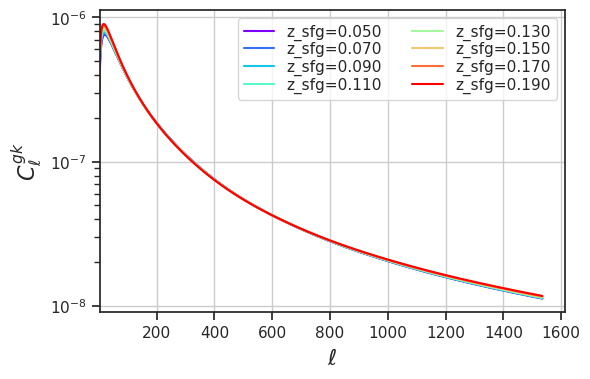

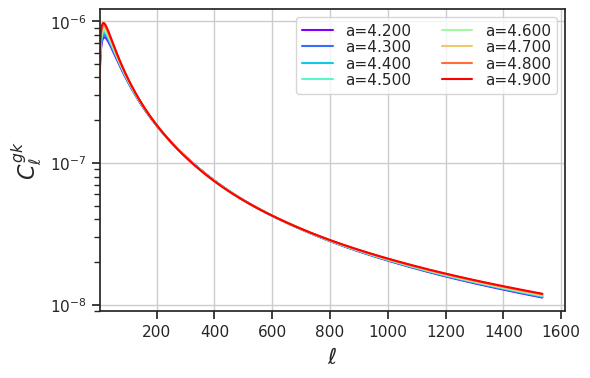

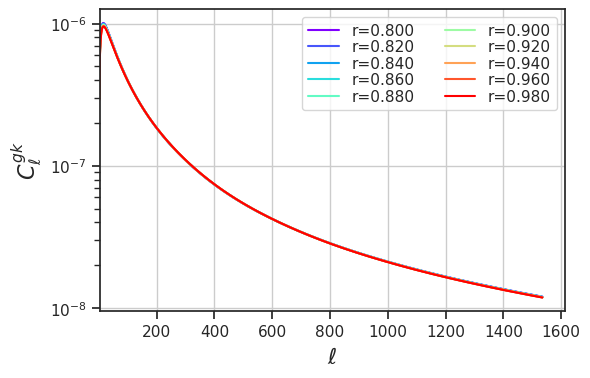

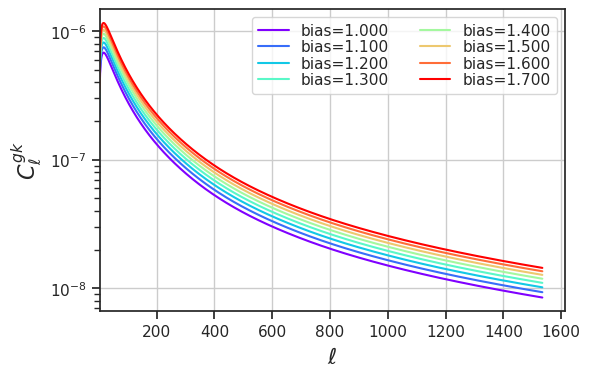

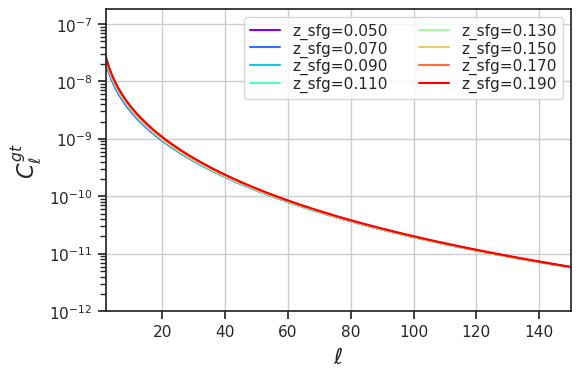

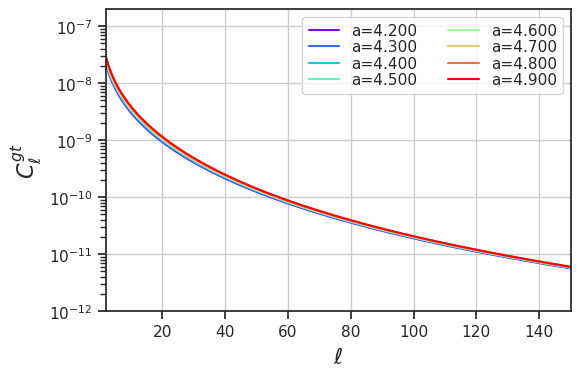

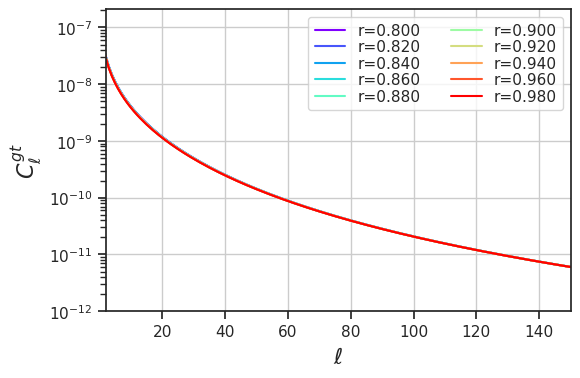

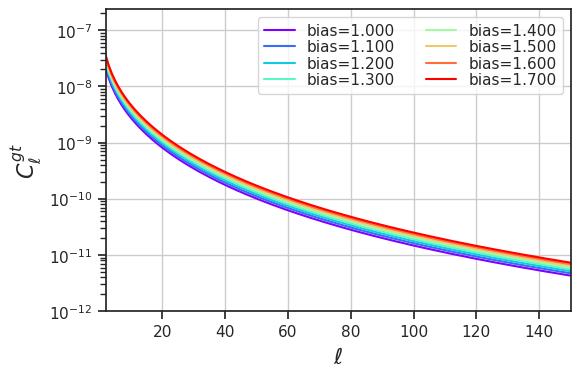

In [9]:
for correlation_symbol in to_plot_correlations:
    for param_name, param_values in to_plot_tuples:
        plt.figure()

        colors = plt.cm.rainbow(np.linspace(0, 1, len(param_values)))
        for i, param_value in enumerate(param_values):
            plt.plot(l_arr, correlations[param_name][param_value][correlation_symbol], label='{}={:.3f}'.format(param_name, param_value), c=colors[i])

        plt.xlim(xmin=2, xmax=None)
        if correlation_symbol == 'gt':
            plt.xlim(xmin=2, xmax=150)
            plt.ylim(ymin=1e-12, ymax=None)

        plt.xscale('linear')
        plt.yscale('log')
        plt.xlabel('$\\ell$', fontsize=16)
        plt.ylabel('$C_\\ell^{{{}}}$'.format(correlation_symbol), fontsize=16)
        plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
        plt.grid()
        plt.show()

# Bias model

# Multicomponent shot noise

In [11]:
config = get_config('LoTSS_DR2')
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'is_optical': False,
 'lss_mask_name': 'Mask_coverage',
 'nside': 512,
 'flux_min_cut': 2,
 'signal_to_noise': 5,
 'dn_dz_model': 'power_law',
 'z_tail': 1.3,
 'z_sfg': 0.15,
 'a': 4.8,
 'r': 0.91,
 'bias_model': 'polynomial',
 'b_0_scaled': 1.4,
 'b_0': 1,
 'b_1': 1,
 'b_2': 1,
 'read_data_correlations_flag': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'l_range': {'gg': [52, 802], 'gk': [52, 802]},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [12]:
config = get_config('LoTSS_DR2')
to_plot_correlations = ['gg', 'gk', 'gt']
to_plot_tuples = [
    ('b_0', np.arange(1.0, 2.1, 0.1)),
    ('b_1', np.arange(1.0, 2.1, 0.1)),
    ('b_2', np.arange(1.0, 2.1, 0.1)),
]

l_arr = np.arange(3 * config['nside'])

correlations = {}
for to_plot_tuple in to_plot_tuples:
    param_name = to_plot_tuple[0]
    param_values = to_plot_tuple[1]

    correlations[param_name] = {}
    for param_value in param_values:
        config[param_name] = param_value
        correlations[param_name][param_value] = get_theory_correlations(config, to_plot_correlations, l_arr)

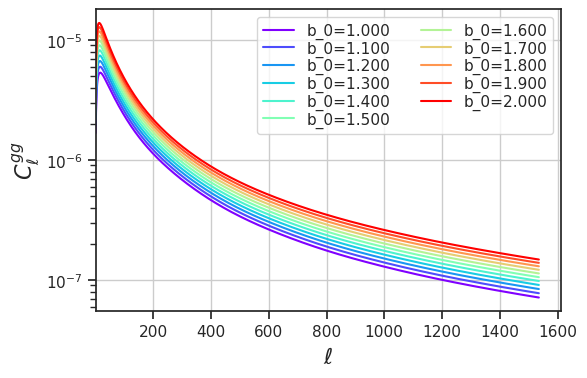

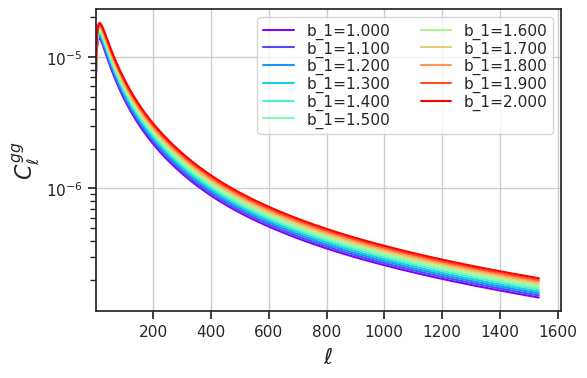

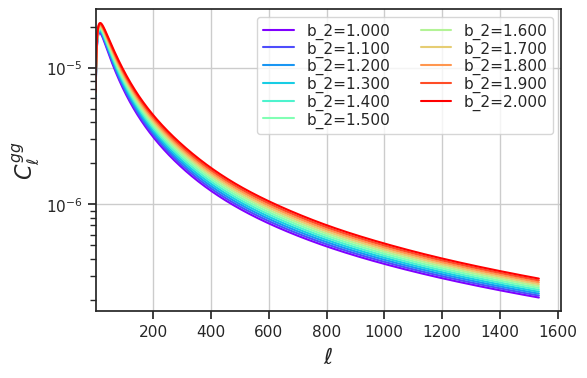

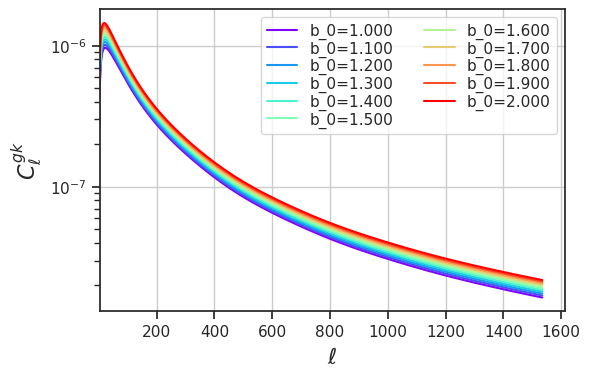

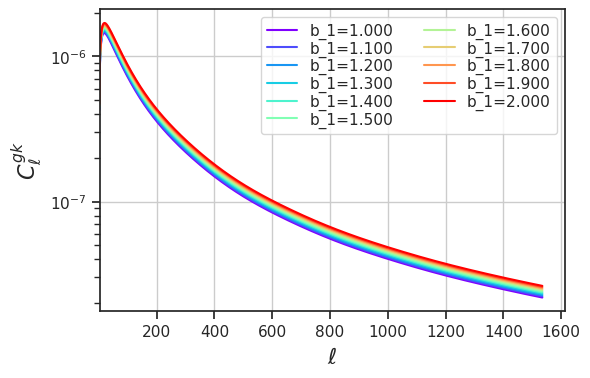

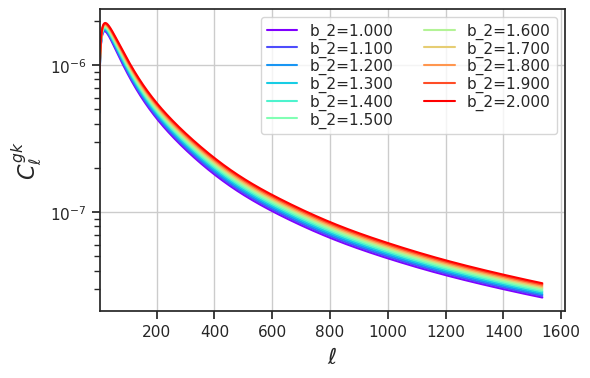

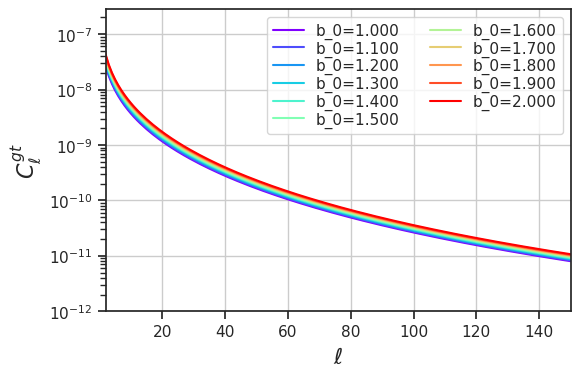

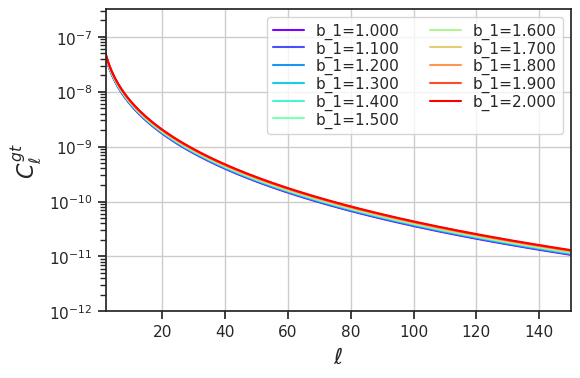

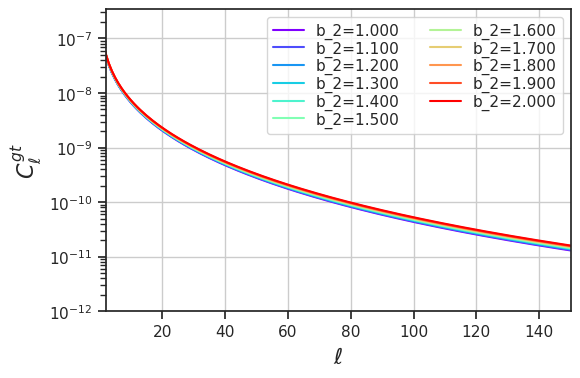

In [13]:
for correlation_symbol in to_plot_correlations:
    for param_name, param_values in to_plot_tuples:
        plt.figure()

        colors = plt.cm.rainbow(np.linspace(0, 1, len(param_values)))
        for i, param_value in enumerate(param_values):
            plt.plot(l_arr, correlations[param_name][param_value][correlation_symbol], label='{}={:.3f}'.format(param_name, param_value), c=colors[i])

        plt.xlim(xmin=2, xmax=None)
        if correlation_symbol == 'gt':
            plt.xlim(xmin=2, xmax=150)
            plt.ylim(ymin=1e-12, ymax=None)

        plt.xscale('linear')
        plt.yscale('log')
        plt.xlabel('$\\ell$', fontsize=16)
        plt.ylabel('$C_\\ell^{{{}}}$'.format(correlation_symbol), fontsize=16)
        plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
        plt.grid()
        plt.show()

# Redshift distribution

## Comparison of dp / dz

In [83]:
# Redshift models
data_optical = get_lotss_data(data_release=2, flux_min_cut=None, optical=True, columns=['Total_flux', 'z_best'])
data_skads = get_skads_sim_data()

Original LoTSS DR2 datashape: (1819424, 93)


In [103]:
redshift_distributions = get_redshift_distributions(data_optical, data_skads)
redshift_distributions = normalize_dists(redshift_distributions)

In [104]:
# tomographer = pd.read_csv(os.path.join(DATA_PATH, 'LoTSS/tomographer/full_maskstrict_I2mJy_q5.csv'))
# redshift_distributions_bias['tomographer'][2] = {
#     'z': tomographer['z'][:-1],
#     'pz': tomographer['dNdz_b'][:-1],
#     'pz_min': tomographer['dNdz_b'][:-1] - tomographer['dNdz_b_err'][:-1] / 2,
#     'pz_max': tomographer['dNdz_b'][:-1] + tomographer['dNdz_b_err'][:-1] / 2,
# }
redshift_distributions_bias = scale_with_bias(redshift_distributions)

In [105]:
# Bias models
z_arr = redshift_distributions_bias['tomographer fit'][2]['z']
bias_arr = np.ones(len(z_arr))
with open(os.path.join(PROJECT_PATH, 'cosmologies.yml'), 'r') as cosmology_file:
    cosmology_params = yaml.full_load(cosmology_file)['planck']
cosmology = ccl.Cosmology(**cosmology_params)
bias_arr = 1.5 * bias_arr / ccl.growth_factor(cosmology, 1. / (1. + np.array(z_arr)))

bias_models = {
    '1/D(z)': {'z': z_arr, 'b': bias_arr},
}

z_arr_tmp, n_arr_tmp = get_lotss_redshift_distribution(z_sfg=0.15, a=4.8, r=0.91, model='power_law', z_arr=redshift_distributions_bias['tomographer fit'][2]['z'])
bias_models['tomographer fit'] = {'z': redshift_distributions_bias['tomographer fit'][2]['z'], 'b': 1.5 * redshift_distributions_bias['tomographer fit'][2]['pz'] / n_arr_tmp}

/tmp/ipykernel_159629/1765629196.py:14: RuntimeWarning: invalid value encountered in true_divide
  bias_models['tomographer fit'] = {'z': redshift_distributions_bias['tomographer fit'][2]['z'], 'b': 1.5 * redshift_distributions_bias['tomographer fit'][2]['pz'] / n_arr_tmp}


In [106]:
# b g r c m y
styles_z = {
    'deep fields': 'b',
    'deep fields, boot': 'b--',
#     'power law AGN, to deep fields': 'r--',
    # 'power law AGN, DR2': 'r--',
    # 'z tail, DR1': 'g--',
    # 'photo-z, DR2': 'c',
    # 'SKADS': 'g',
    'tomographer fit': 'g',
    'TRECS': 'r',
}

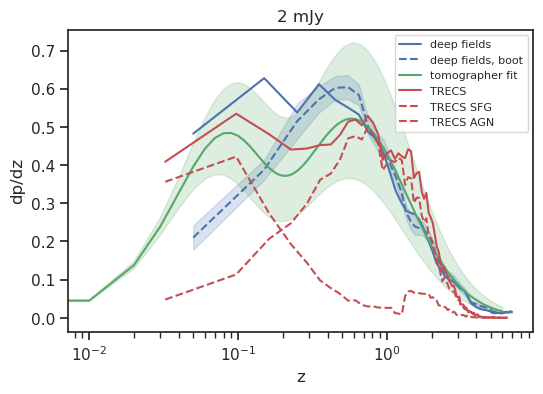

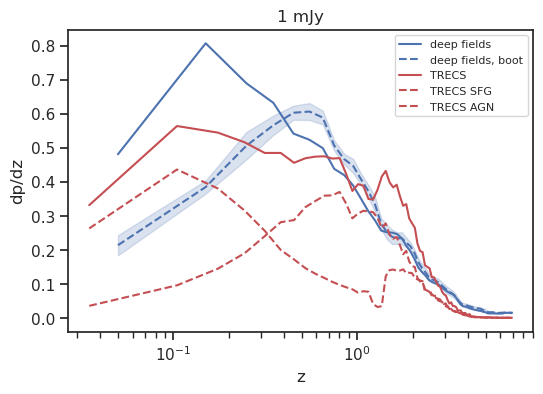

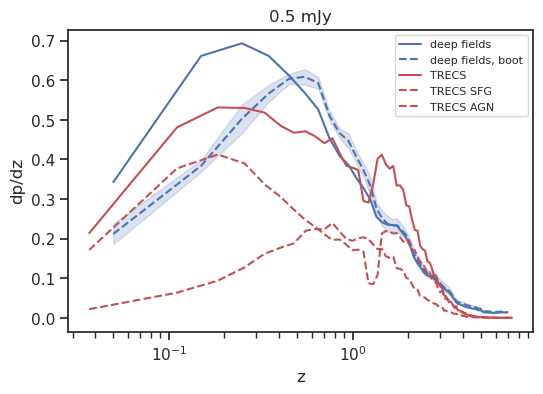

In [107]:
plot_redshift_distributions(redshift_distributions, styles_z, xscale='log', legend_size=8)

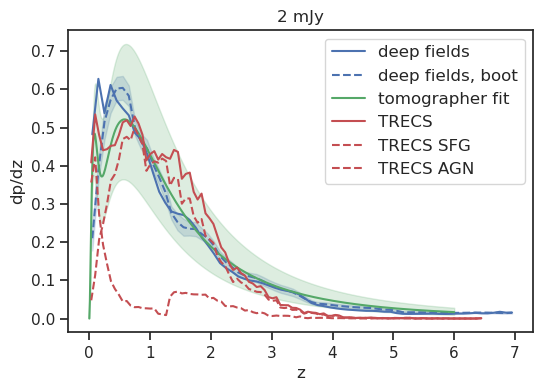

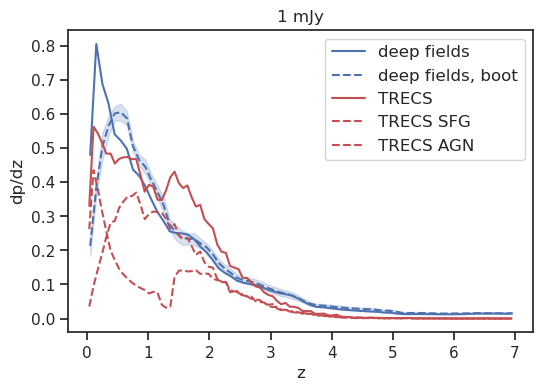

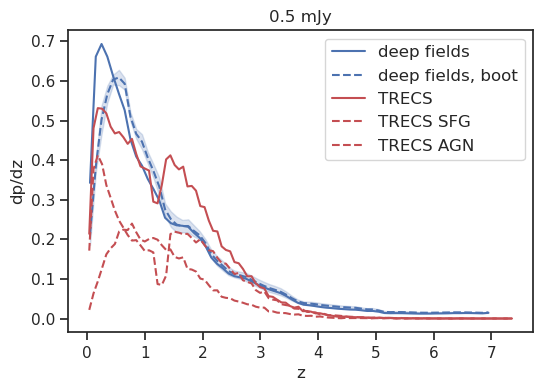

In [108]:
plot_redshift_distributions(redshift_distributions, styles_z, xscale='linear')

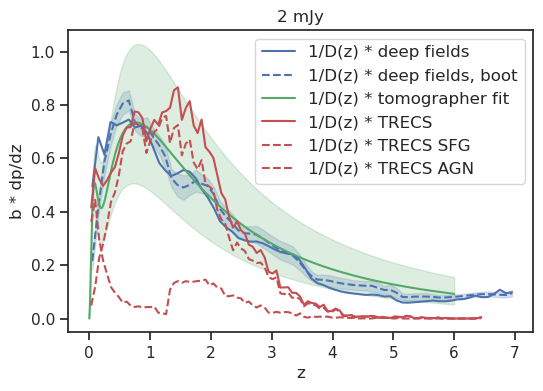

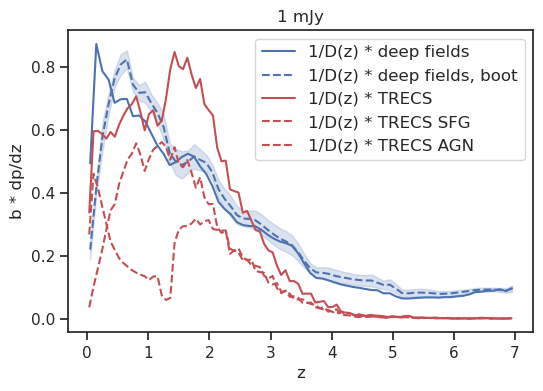

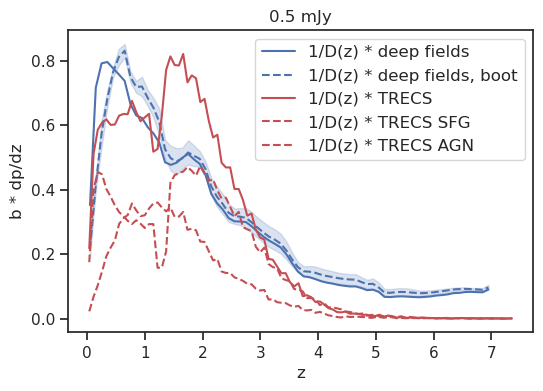

In [109]:
bias_scales = {
    'deep fields': (1, '1/D(z)'),
    'deep fields, boot': (1, '1/D(z)'),
    # 'power law AGN, DR2': (1, '1/D(z)'),
    # 'z tail, DR1': (1, '1/D(z)'),
    'tomographer fit': (1, '1/D(z)'),
    'TRECS': (1, '1/D(z)'),
}
plot_redshift_distributions(redshift_distributions_bias, styles_z, ylabel='b * dp/dz', bias_scales=bias_scales, xscale='linear')

In [110]:
for bias_name, bias_model in bias_models.items():
    y, _ = normalize_dist(bias_model['z'], bias_model['b'])
    plt.plot(bias_model['z'], bias_model['b'], label=bias_name)
    plt.xlim(left=0.05)
    plt.ylim(top=9)
    plt.legend()

NameError: name 'normalize_dist' is not defined

## Tomographer fits

In [13]:
# Read tomographer
tomographer = pd.read_csv(os.path.join(DATA_PATH, 'LoTSS/tomographer/full_maskstrict_I2mJy_q5.csv'))

# Apply bias model by scalling the tomographer
tomographer_biased = copy.copy(tomographer)

with open(os.path.join(PROJECT_PATH, 'cosmologies.yml'), 'r') as cosmology_file:
    cosmology_params = yaml.full_load(cosmology_file)['planck']
cosmology = ccl.Cosmology(**cosmology_params)

tomographer_biased['dNdz_b'] *= ccl.growth_factor(cosmology, 1. / (1. + tomographer['z']))
tomographer_biased['dNdz_b_err'] *= ccl.growth_factor(cosmology, 1. / (1. + tomographer['z']))

In [14]:
# Make fits with scipy
z_sfg_0 = 0.13
a_0 = 4.66
r_0 = 0.94

p_0 = (z_sfg_0, a_0, r_0, 1000)
p_0_biased = (z_sfg_0, a_0, r_0, 5000)

popt, perr = make_tomographer_fit(tomographer, p_0)
popt_biased, perr_biased = make_tomographer_fit(tomographer_biased, p_0_biased)

/home/snakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
print(popt, perr)

[3.91057314e-02 3.58746217e+00 1.75594389e-01 1.24037524e+05] [8.16051551e-03 2.70879023e-01 4.71097999e-02 6.90096485e+04]


In [16]:
print(popt_biased, perr_biased)

[3.77263046e-02 4.44865395e+00 1.81466381e-01 1.26555771e+05] [7.89948246e-03 2.66729855e-01 5.02055812e-02 7.26426331e+04]


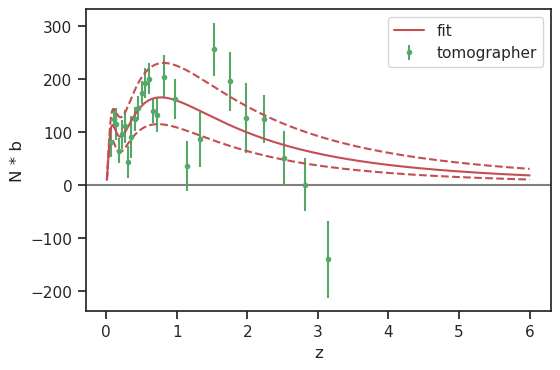

In [25]:
make_tomographer_plot(tomographer, popt, perr, ylabel='N * b', xscale='linear', add_bias=False)

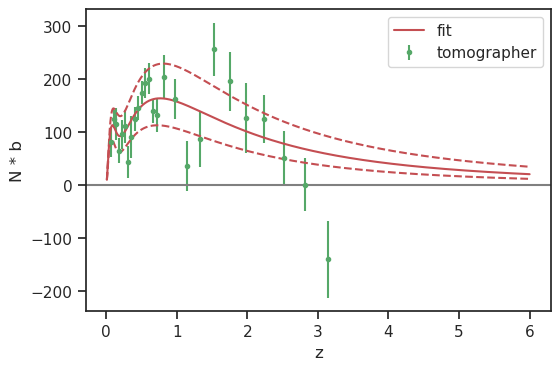

In [26]:
make_tomographer_plot(tomographer_biased, popt_biased, perr_biased, ylabel='N * b', xscale='linear', add_bias=True)

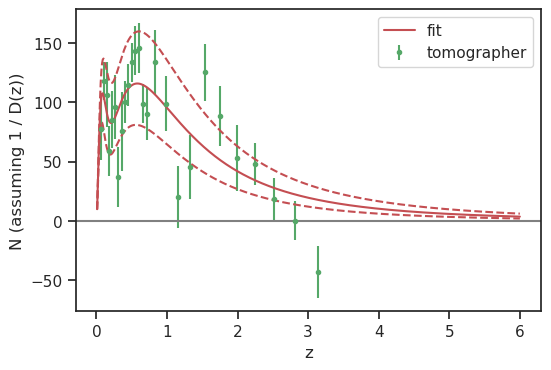

In [27]:
make_tomographer_plot(tomographer_biased, popt_biased, perr_biased, xscale='linear', ylabel='N (assuming 1 / D(z))', add_bias=False)

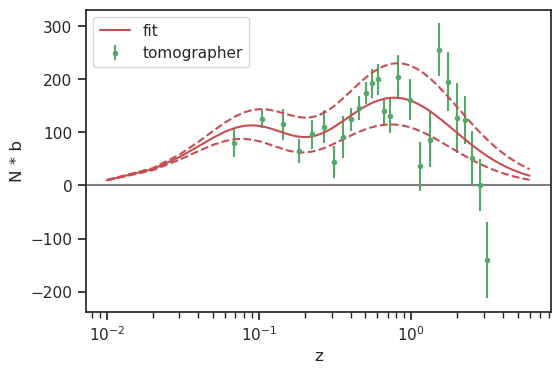

In [28]:
make_tomographer_plot(tomographer, popt, perr, xscale='log', add_bias=False)

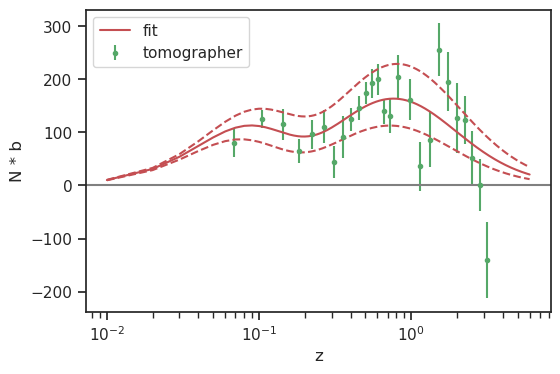

In [29]:
make_tomographer_plot(tomographer_biased, popt_biased, perr_biased, xscale='log', add_bias=True)

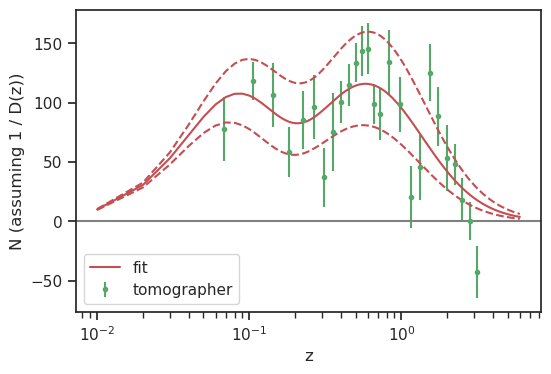

In [30]:
make_tomographer_plot(tomographer_biased, popt_biased, perr_biased, xscale='log', ylabel='N (assuming 1 / D(z))', add_bias=False)

In [19]:
data = get_lotss_data(data_release=2, flux_min_cut=None, optical=True)

../data_lotss.py:260: TableReplaceWarning: converted column 'release' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:260: TableReplaceWarning: converted column 'brickid' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:260: TableReplaceWarning: converted column 'objid' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:260: TableReplaceWarning: converted column 'maskbits' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:260: TableReplaceWarning: converted column 'flag_qual' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:260: TableReplaceWarning: converted column 'zwarning_sdss' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:260: TableReplaceWarning: converted column 'plate_sdss' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:260: TableReplaceWarning: converted column 'mjd_s

Original LoTSS DR2 datashape: (1819424, 93)


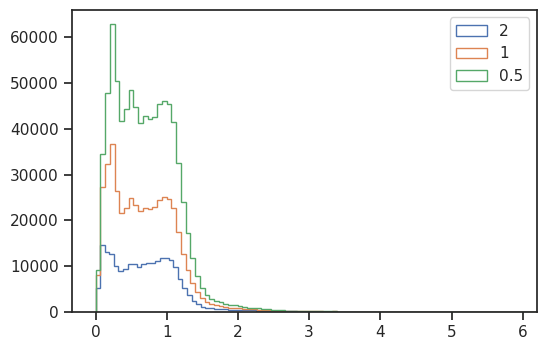

In [25]:
# DR2
for flux_cut in [2, 1, 0.5]:
    data_cut = data.loc[data['Total_flux'] > flux_cut]
    plt.hist(data_cut['z_best'], bins=100, label=flux_cut, histtype='step', density=False)
plt.xlim(right=6.2)
plt.legend()

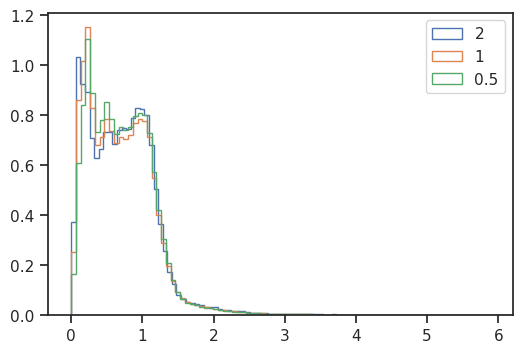

In [26]:
# DR2
for flux_cut in [2, 1, 0.5]:
    data_cut = data.loc[data['Total_flux'] > flux_cut]
    plt.hist(data_cut['z_best'], bins=100, label=flux_cut, histtype='step', density=True)
plt.xlim(right=6.2)
plt.legend()

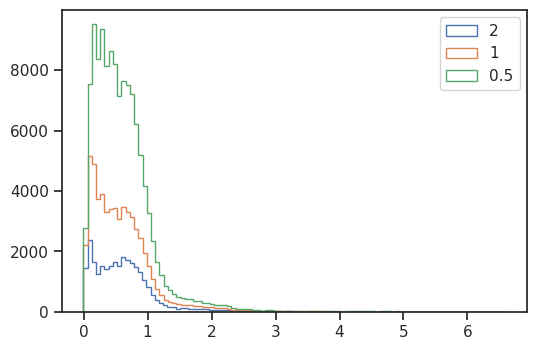

In [11]:
# DR1
for flux_cut in [2, 1, 0.5]:
    data_cut = data.loc[data['Total_flux'] > flux_cut]
    plt.hist(data_cut['z_best'], bins=100, label=flux_cut, histtype='step', density=False)
plt.legend()

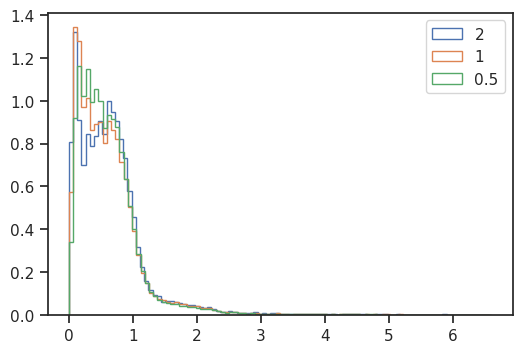

In [29]:
# DR1
for flux_cut in [2, 1, 0.5]:
    data_cut = data.loc[data['Total_flux'] > flux_cut]
    plt.hist(data_cut['z_best'], bins=100, label=flux_cut, histtype='step', density=True)
plt.legend()

# Maps

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globa

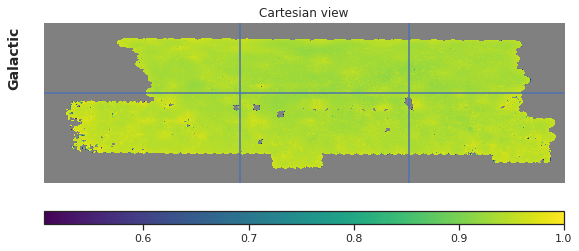

In [7]:
%matplotlib inline
hp.visufunc.cartview(map=experiment.masks['g'], xsize=1000, lonra=[105, -70], latra=[18, 75], badcolor='gray', bgcolor='white', cbar=False, coord='G', norm=None, cmap='viridis')
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
fig.colorbar(image, orientation='horizontal', aspect=40, pad=0.08, ax=ax)

lat_arr = [50]
lon_arr = [-160, -220]
for lat in lat_arr:
    lon_range = np.arange(-360, 0, 1)
    plt.plot(lon_range, [lat] * len(lon_range), 'b')
for lon in lon_arr:
    lat_range = np.arange(-90, 90, 1)
    plt.plot([lon] * len(lat_range), lat_range, 'b')

plt.show()

## Interactive

In [ ]:
%matplotlib widget
my_mollview(experiment.masks['g'], unit='mask', fwhm=0, zoom=True)

In [ ]:
%matplotlib widget
my_mollview(experiment.base_maps['g'], unit='counts', fwhm=0, zoom=True)

In [ ]:
%matplotlib widget
my_mollview(experiment.processed_maps['g'], unit='overdensity', fwhm=0)

## Non interactive

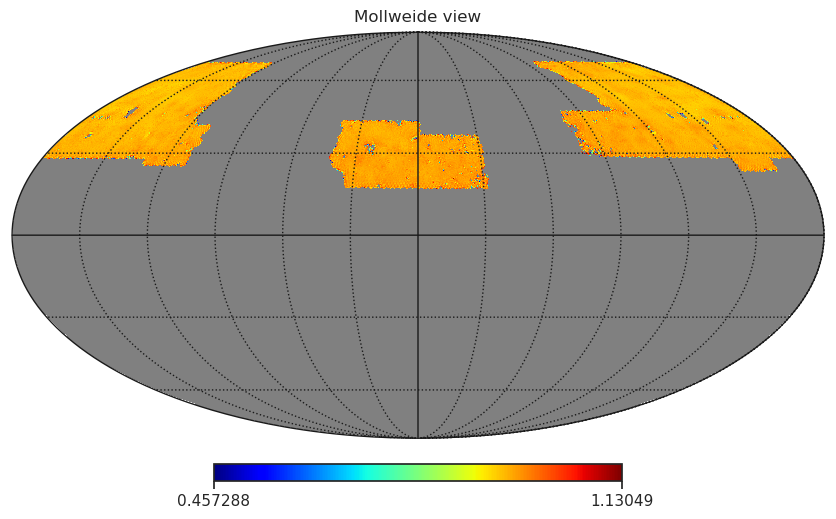

In [18]:
my_mollview(experiment.masks['g'], unit='', fwhm=0.002)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 40.767446 arcmin (0.011859 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 96.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


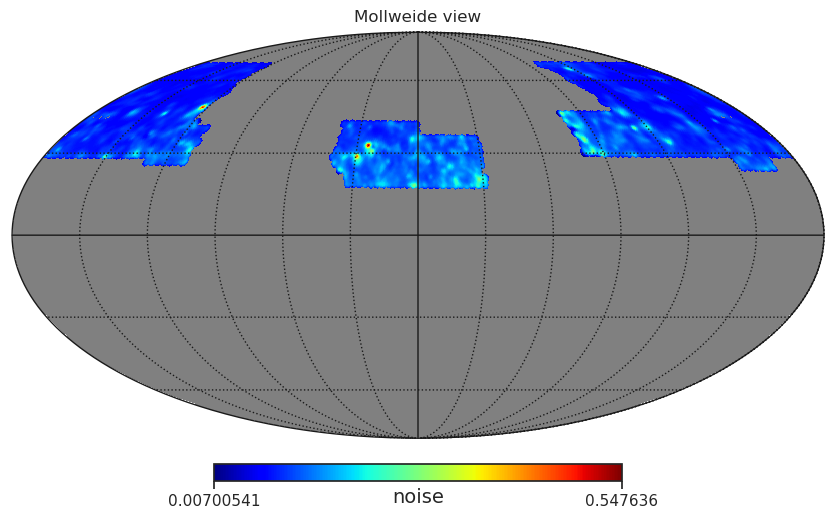

In [13]:
my_mollview(experiment.noise_maps['g'], unit='noise', fwhm=1.6)

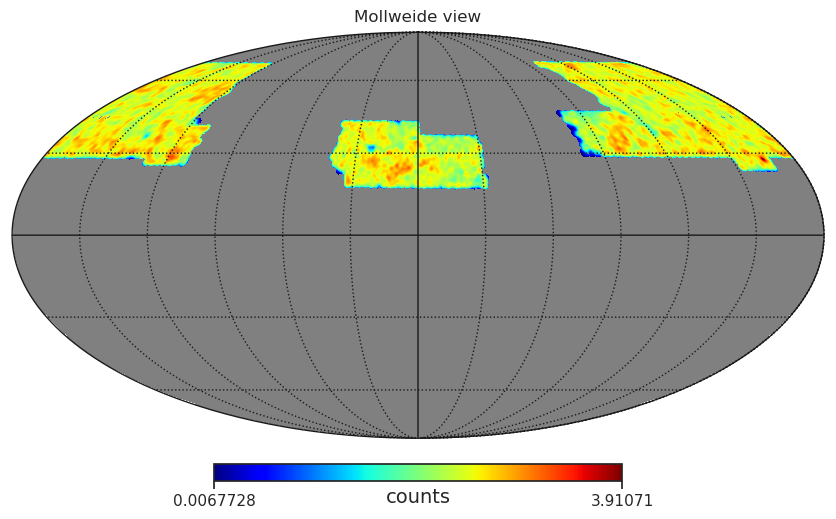

In [14]:
my_mollview(experiment.base_maps['g'], unit='counts', fwhm=1.4)

In [9]:
my_mollview(experiment.processed_maps['t'], unit='mK', fwhm=1.2)

KeyError: 't'

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


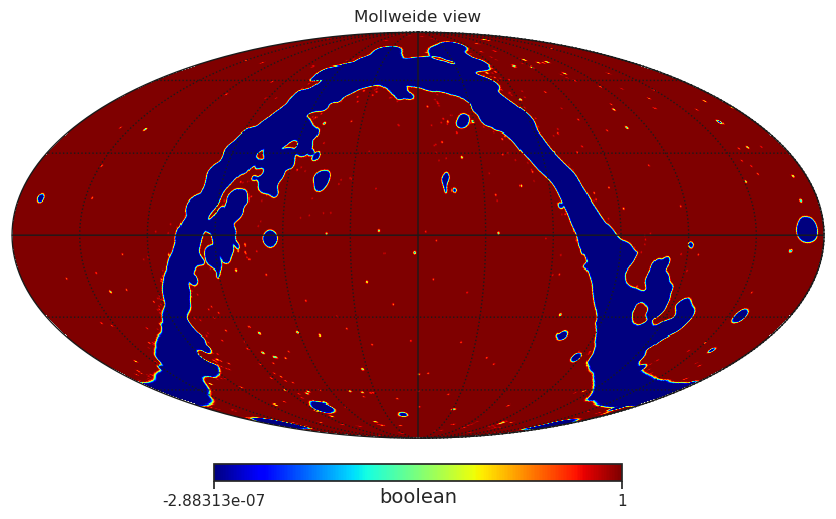

In [11]:
my_mollview(experiment.masks['t'], unit='boolean', fwhm=0.6)

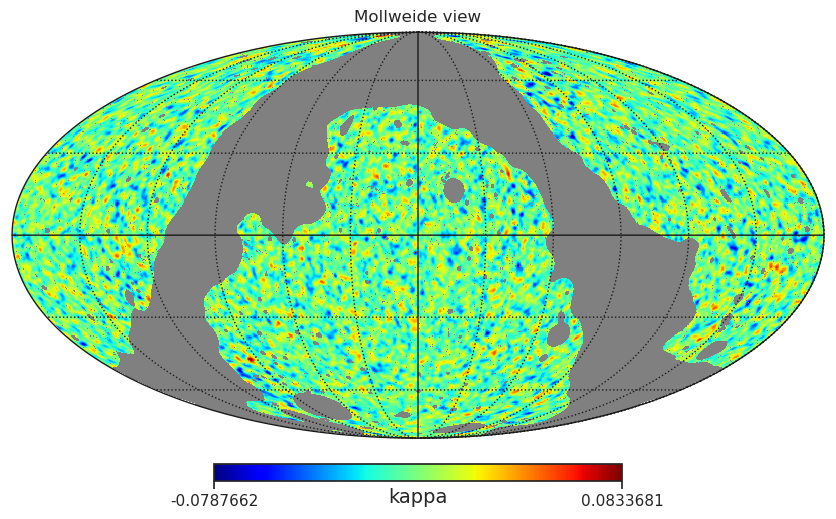

In [15]:
my_mollview(experiment.processed_maps['k'], unit='kappa', fwhm=1.6)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 20.383723 arcmin (0.005929 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 48.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


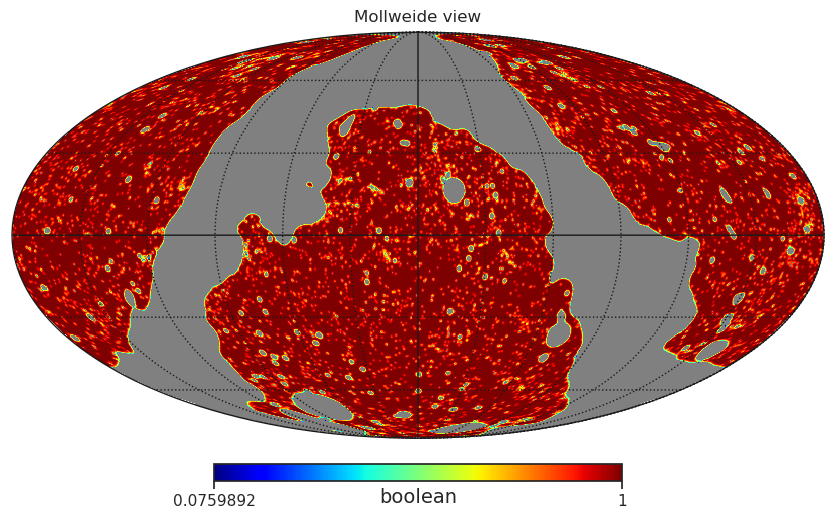

In [16]:
my_mollview(experiment.masks['k'], unit='boolean', fwhm=0.8)